<a href="https://colab.research.google.com/github/IgorMozetic/Imersoes_Alura/blob/main/Aula4_Imersao_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imersão_Dados Alura - Aula 04

Nome: Igor Mozetic

Linkedin: https://www.linkedin.com/in/igor-mozetic/

Github: https://github.com/IgorMozetic

##Primeiro passo - Importar a base de dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np #importando a biblioteca que irá ser utilizada e dando um apelido a ela

url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true' #passando a url para a variável 'url_dados'

df_dados = pd.read_csv(url_dados, compression = 'zip') #lendo a base de dados dentro de um arquivo zip e passando para a variàvel 'df_dados'
display(df_dados) #exibindo a base de dados

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397

In [2]:
df_dados_resultados = pd.read_csv(r'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_resultados.csv?raw=true')
df_dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##Analisar a base

Antes dos desafios, vamos estudar um pouco mais sobre a nossa base de dados.

### df_dados

In [3]:
print(df_dados.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 877 entries, id to c-99
dtypes: float64(872), int64(1), object(4)
memory usage: 159.3+ MB
None


In [4]:
mapa = {'droga': 'composto'}
df_dados.rename(columns=mapa, inplace=True)
df_dados.head()

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


Após realizar a análise da base de dados, foi interpretado que não existem esse número tão extenso de drogas, portanto a coluna droga teve seu nome substituido para compostos, pois são pequenas moléculas que ainda estão em fase de teste para no futuro se os teste ocorrerem corretamente, tornar-se uma droga.

O comando `.info()` nos traz algumas infos sobre a nossa tabela, no caso a quantidade de linhas e colunas, os data-types que estão presentes nela e mais algumas coisas.

Agora vamos saber quais valores, a quantidade e a proporção deles em cada coluna

O comando `unique()` traz quais valores são encontrados na tabela

O comando `value_counts())` informa a quantidade que cada valor tem na coluna

O comando `value_counts(normalize = True)` informa a quantidade em forma de porcentagem

####Tratamento

In [5]:
df_dados['tratamento'].unique()

array(['com_droga', 'com_controle'], dtype=object)

In [6]:
df_dados['tratamento'].value_counts()

com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64

In [7]:
df_dados['tratamento'].value_counts(normalize = True).map('{:.1%}'.format)

com_droga       92.2%
com_controle     7.8%
Name: tratamento, dtype: object

####Tempo

In [8]:
df_dados['tempo'].unique() 

array([24, 72, 48])

In [9]:
df_dados['tempo'].value_counts()

48    8250
72    7792
24    7772
Name: tempo, dtype: int64

In [10]:
df_dados['tempo'].value_counts(normalize = True).map('{:.1%}'.format)

48    34.6%
72    32.7%
24    32.6%
Name: tempo, dtype: object

####Dose

In [11]:
df_dados['dose'].unique() 

array(['D1', 'D2'], dtype=object)

In [12]:
df_dados['dose'].value_counts()

D1    12147
D2    11667
Name: dose, dtype: int64

In [13]:
df_dados['dose'].value_counts(normalize = True).map('{:.1%}'.format)

D1    51.0%
D2    49.0%
Name: dose, dtype: object

####Composto

In [14]:
df_dados['composto'].unique()

array(['b68db1d53', 'df89a8e5a', '18bb41b2c', ..., '573c787a2',
       'b2fe3eca7', 'dd4a96d16'], dtype=object)

In [15]:
df_dados['composto'].value_counts() 

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
             ... 
a1a9a44dd       1
dd4a96d16       1
81a463c0a       1
23458e56a       1
f0d1b8dbc       1
Name: composto, Length: 3289, dtype: int64

In [16]:
df_dados['composto'].value_counts(normalize = True).map('{:.1%}'.format)

cacb2b860    7.8%
87d714366    3.0%
9f80f3f77    1.0%
8b87a7a83    0.9%
5628cb3ee    0.8%
             ... 
a1a9a44dd    0.0%
dd4a96d16    0.0%
81a463c0a    0.0%
23458e56a    0.0%
f0d1b8dbc    0.0%
Name: composto, Length: 3289, dtype: object

Em tratamento, tempo e doses, há um número pequeno de variantes de valores, porém em droga existe um número maior

####Gráficos



#####Pizza

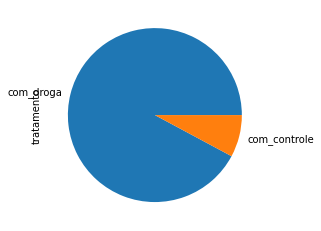

In [17]:
df_dados['tratamento'].value_counts().plot.pie()

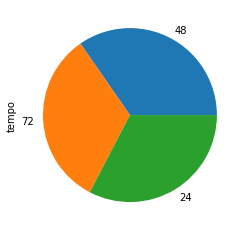

In [18]:
df_dados['tempo'].value_counts().plot.pie()

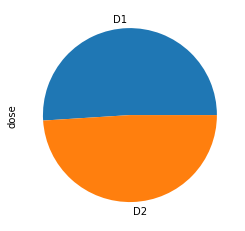

In [19]:
df_dados['dose'].value_counts().plot.pie()

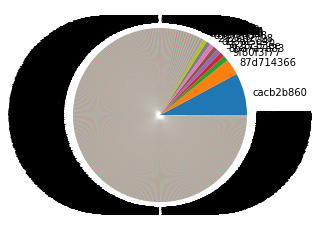

In [20]:
df_dados['composto'].value_counts().plot.pie()

Percebe-se que ao realizar os gráfico em gráfico de pizza, a análise dos mesmos não da para ser exata e pode até ocorre erros.

#####Barra

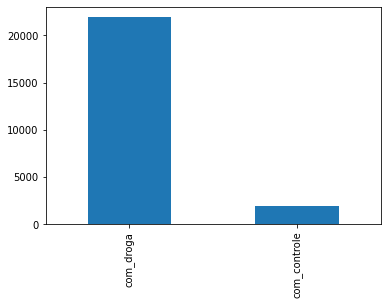

In [21]:
df_dados['tratamento'].value_counts().plot.bar()

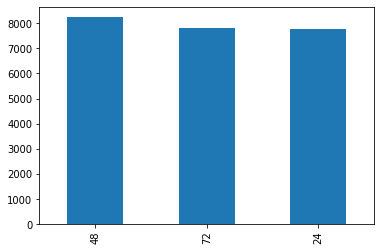

In [22]:
df_dados['tempo'].value_counts().plot.bar()

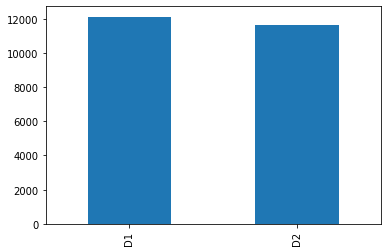

In [23]:
df_dados['dose'].value_counts().plot.bar()

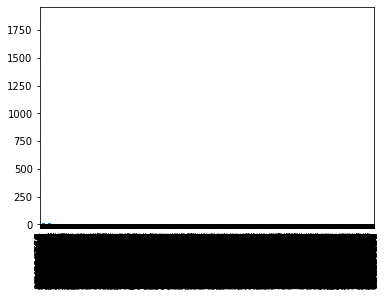

In [24]:
df_dados['composto'].value_counts().plot.bar()

Percebe-se que ao realizar os gráfico em gráfico de barra, a análise dos mesmos é bem mais exata comparando aos de Pizza

### df_dados_resultados

In [25]:
print(df_dados_resultados.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 207 entries, id to wnt_inhibitor
dtypes: int64(206), object(1)
memory usage: 37.6+ MB
None


In [26]:
df_dados_resultados['acat_inhibitor'].unique()

array([0, 1])

In [27]:
df_dados_resultados['acetylcholine_receptor_agonist'].unique()

array([0, 1])

In [28]:
df_dados_resultados['num_moa'] = df_dados_resultados.drop('id', axis=1).sum(axis=1)
df_dados_resultados

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,num_moa
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
23810,id_fffb70c0c,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
23811,id_fffc1c3f4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23812,id_fffcb9e7c,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [29]:
df_dados_resultados['ativo_moa'] = (df_dados_resultados['num_moa'] != 0)
df_dados_resultados

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,num_moa,ativo_moa
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,True
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True
23810,id_fffb70c0c,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True
23811,id_fffc1c3f4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
23812,id_fffcb9e7c,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True


In [30]:
df_dados_juntos = pd.merge(df_dados, df_dados_resultados[['id', 'num_moa', 'ativo_moa']], on ='id')
df_dados_juntos.head()

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,num_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True


Como podemos perceber, os valores dentro da tabela são apenas de 0 e de 1, isso significa que cada linha dessa nossa nova base de dados é o resultado de um experimento da antiga base de dados. Quando o número é 1, siginifica que ele é ativado, quando o número é 0, significa que ele não foi ativado.

##Desafio 01: Encontrar o top 10, das ações do MOA (inibidor, agonista...)

In [31]:
#pode ser utrilizado também: tabel_moa = df_dados_resultados.select_dtypes('int64').sum().sort_values(ascending=False)
tabel_moa = df_dados_resultados.drop(['id', 'num_moa', 'ativo_moa'], axis=1).sum().sort_values(ascending=False)
tabel_moa

nfkb_inhibitor                                832
proteasome_inhibitor                          726
cyclooxygenase_inhibitor                      435
dopamine_receptor_antagonist                  424
serotonin_receptor_antagonist                 404
                                             ... 
protein_phosphatase_inhibitor                   6
autotaxin_inhibitor                             6
diuretic                                        6
erbb2_inhibitor                                 1
atp-sensitive_potassium_channel_antagonist      1
Length: 206, dtype: int64

Nessa parte do código pegamos os resultados mais ocorrentes

`select_dtypes()` é o comando que seleciona o tipo de dados no qual você deseja realizar a função.

`.sort_values()` é o comando no qual ordena os dados. 

`ascending` é o parâmetro a ser passado para a ordenação caso seja crescente = True, caso seja decrescente = False.

In [32]:
# split_nome.split([])
split_nome = [cont.split('_')[-1]for cont in tabel_moa.index]
split_nome[:10]

['inhibitor',
 'inhibitor',
 'inhibitor',
 'antagonist',
 'antagonist',
 'inhibitor',
 'antagonist',
 'antagonist',
 'inhibitor',
 'inhibitor']

Nesse trecho divimos a string utilizando o comando `split()`. Em seu parâmetro passamos qual o tipo de caracter que desejamos dividir as strings.

`for cont in soma_moa.index` este comando de repitição diz que enquanto o cont estiver dentro das linhas do soma_moa, `cont.split('_')[-1]` a separação das strings irá ocorrer e irá ficar com apenas a segunda parte, indicada no vetor.

In [33]:
nova_tabela = pd.DataFrame(data = {'Moa':tabel_moa.index, 'contagem':tabel_moa.values, 'Ação':split_nome})
nova_tabela

,Moa,contagem,Ação
0,nfkb_inhibitor,832,inhibitor
1,proteasome_inhibitor,726,inhibitor
2,cyclooxygenase_inhibitor,435,inhibitor
3,dopamine_receptor_antagonist,424,antagonist
4,serotonin_receptor_antagonist,404,antagonist
...,...,...,...
201,protein_phosphatase_inhibitor,6,inhibitor
202,autotaxin_inhibitor,6,inhibitor
203,diuretic,6,diuretic
204,erbb2_inhibitor,1,inhibitor


Nesse trecho criou-se um dataframe com os valores antigos e a inclusão da tabela ação, com a string separada.

In [34]:
top10_table = nova_tabela.groupby(by=['Ação']).sum()['contagem'].sort_values(ascending=False).reset_index()[:10]
top10_table.columns = ['Moa', 'Quantidade']
top10 = nova_tabela.groupby(by=['Ação']).sum()['contagem'].sort_values(ascending=False)[:10]
top10_table

,Moa,Quantidade
0,inhibitor,9693
1,antagonist,3449
2,agonist,2330
3,blocker,323
4,agent,150
5,activator,115
6,local,80
7,immunosuppressant,73
8,anti-inflammatory,73
9,antioxidant,73


Nesse trecho foi agrupada todos os valores que tinham o Moa igual para realizar a soma e sonsequente o top-10 de quais ações mais ocorreram nesse experimento.

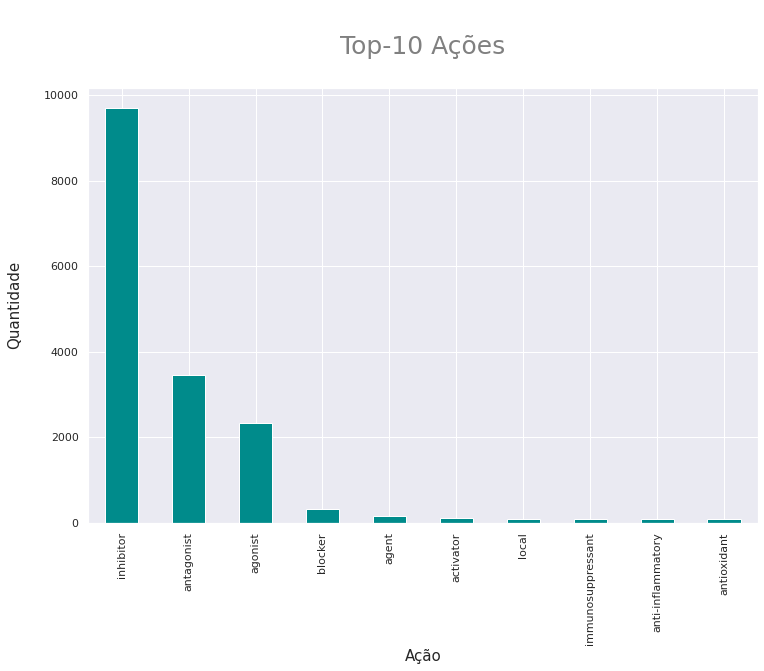

In [35]:
sns.set()
plt.figure(figsize=(12,8))
plt.xlabel('\nAção', fontsize=15)
plt.ylabel('Quantidade\n', fontsize=15)
plt.title('\nTop-10 Ações\n', fontsize=25, color='gray')
top10.plot.bar(color='darkcyan')
plt.show()

Aqui foi criado um gráfico para apresentar os resultados.

##Desafio 02: Criar a coluna eh_controle para quando na linha tratamento == com_controle

In [36]:
nova_coluna = df_dados_juntos['tratamento']=='com_controle'
nova_coluna

0        False
1        False
2        False
3        False
4        False
         ...  
23809    False
23810    False
23811     True
23812    False
23813    False
Name: tratamento, Length: 23814, dtype: bool

Nesse trecho de código, foi selecionado todas as linhas que o experimeto foi feito com_controle, se for feito com controle o resultado será True, senão, o resultado será False

In [37]:
df_dados_juntos['eh_controle'] = nova_coluna.astype('int')
df_dados_juntos[30:50]

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,num_moa,ativo_moa,eh_controle
30,id_0062bfc63,com_droga,72,D1,04765e596,-0.0722,0.5334,-0.3034,0.2864,0.1788,-0.2903,-1.0640,0.4018,-0.0052,0.6192,0.4692,-0.2431,-0.3317,-1.4630,0.0243,0.8335,1.0290,-1.2610,-0.0644,-0.5713,-0.2902,0.4359,-0.2686,-0.6694,1.1930,0.4999,0.8176,0.5925,-0.4233,0.0024,0.0541,-0.5430,0.2117,-0.7918,0.3053,...,-0.9710,-0.3202,-1.6210,-0.4331,0.1021,-0.3691,0.4567,0.3925,-1.0310,-0.3229,-0.8790,-0.7145,-0.9285,0.6254,0.1485,-0.5260,-0.6148,-0.6177,0.0507,0.4905,-0.6723,-0.8491,0.1503,-0.9285,-0.1712,-0.8487,-0.5905,0.6560,-0.3864,0.6428,-0.4056,-0.0280,-0.4832,-0.6999,-0.3582,-0.5519,0.2358,0,False,0
31,id_0063cd461,com_droga,48,D2,cb6fd5cd9,-0.2149,-0.3405,-1.1210,-0.8598,-0.2194,-0.1063,-0.0742,-0.1301,-0.5526,-0.2239,0.5120,0.2004,-0.2072,-0.7935,-0.1077,0.6562,-0.2404,-0.1806,0.5628,0.1977,-0.3512,-0.5629,0.3858,0.4789,-0.1542,-1.0040,0.7817,1.0610,-0.6167,-0.6317,0.4098,0.5938,-0.2449,0.8306,-0.1153,...,-0.3567,0.1355,-0.1102,0.0441,-0.5824,0.1999,-0.3132,-0.6793,-0.4055,-0.0085,-1.2080,1.3190,-0.8079,-0.3544,-0.3679,0.2589,-0.4285,0.5684,-0.0119,-0.4336,-0.0071,0.5078,-0.1658,0.3093,0.3114,0.5516,0.0858,0.8775,-0.0593,-0.1088,-0.9292,0.7622,-0.4656,0.6711,0.0005,-0.2453,0.4522,0,False,0
32,id_006e27d96,com_droga,24,D2,808cb9eea,0.0549,0.2602,1.6680,0.0603,-0.3156,0.3733,0.8216,0.2614,-0.2959,-0.6601,-0.2911,-0.6416,0.4660,-1.6660,-0.9087,0.0857,-0.2296,-0.3963,-0.1919,0.0664,0.8645,-0.3914,-0.2941,0.2530,0.4741,0.0369,0.8243,0.1756,0.3598,0.2285,-0.1091,-0.0181,0.4631,-0.3700,-0.5516,...,-0.1963,-1.5560,0.5306,-0.8311,0.3223,0.3583,-0.5219,-0.9115,0.5118,-1.3270,0.0223,0.1380,-0.4484,-1.3550,-0.9543,0.5938,-0.9862,-0.2432,-0.8455,0.3119,-0.3904,-0.5096,0.0203,-0.7539,0.9720,-0.6325,1.0530,0.0946,0.0294,0.1041,-0.1413,-1.5430,-1.4180,0.0691,0.1536,0.2948,-0.9860,1,True,0
33,id_006f253ab,com_droga,48,D2,4a65421e6,-0.4857,0.5012,0.1460,-0.1922,0.1351,0.1950,0.2093,-0.0680,-0.7707,-0.2630,0.0707,0.2798,4.2880,-0.6665,-0.1070,0.1977,0.2942,-1.1500,-0.0523,-0.0084,-0.6341,-0.0228,-0.8183,0.3155,0.0008,0.9218,0.2328,-0.4865,0.0576,0.4970,-0.5037,0.2720,1.2730,-0.1894,0.5895,...,1.3900,0.9750,1.1360,1.0470,0.5518,0.5313,0.6565,1.4430,-0.3269,0.8330,-0.1066,1.6860,1.1100,0.6717,0.8680,0.1465,0.3413,1.4260,0.5708,0.2185,0.0208,0.9998,1.2860,0.6748,-0.0154,0.2426,1.0910,1.0440,1.0710,0.1201,0.9271,0.6430,0.9140,0.6681,0.1958,0.9075,0.9393,0,False,0
34,id_006f6dbd6,com_droga,48,D2,bcfa1dcb0,0.4609,0.5753,0.5495,2.4610,1.6050,-2.5540,-0.1335,0.2222,-1.0910,-0.6220,0.7935,0.8547,0.9143,-0.1908,-0.4747,-0.4792,1.3580,0.4301,-0.9517,0.7914,0.4351,0.1804,1.9110,0.1477,1.0030,1.4430,0.7840,1.0620,-1.6050,-0.7285,2.3390,-0.1768,0.1650,-1.8540,-1.3470,...,-3.0570,-0.6158,-5.2330,-1.8920,-0.1741,0.2131,-2.0380,-0.1849,-1.4590,-1.7020,-1.4260,-0.7947,-1.9740,-0.9154,-1.4480,-3.0760,-1.3630,-1.5380,-0.4152,-1.0380,0.9003,-1.1060,-0.2423,-0.4515,1.1920,-1.8380,-1.2710,-2.6520,-0.5733,-0.2621,-2.1140,-1.3090,-1.1340,-0.4571,-0.9343,-4.8480,-1.4790,1,True,0
35,id_0070c63e7,com_droga,48,D2,efa4a3106,-0.2412,0.4320,-0.0671,0.0582,-0.3541,-0.6684,-0.5267,-0.2804,1.1640,0.4313,0.5376,0.1246,0.6518,0.0592,-0.3823,-0.4141,1.8140,1.0920,-0.7774,-0.7361,0.0126,-0.0925,-0.1861,0.5726,-0.2010,-1.3570,-0.2350,-0.0237,0.1214,-0.1247,-0.0752,-0.6393,0.5439,0.5740,-0.4116,...,-0.2119,1.0380,0.6023,-0.0418,0.0196,0.2364,-0.0011,-0.0882,-0.2609,0.6667,-0.3652,0.5187,-0.9934,0.4296,0.6384,0.6566,-0.6010,-0.6416,0.5430,0.2271,0.2206,0.9677,0.1477,-0.3790,0.0533,-1.0330,0.4357,-0.3216,0.1430,-0.1747,-0.0574,0.1948,0.9403,0.6830,0.2920,-0.8565,0.1544,0,False,0

Nessa parte foi adicionado a coluna com o método `astype()`. Esse método Lanca um objeto pandas para um tipo específico dtype dentro de um DF ou não.

##Desafio 03: Criar três colunas para indicar o tempo 24, 48, 72

In [38]:
tm24 = df_dados_juntos['tempo'] == 24
tm24

0         True
1        False
2        False
3        False
4        False
         ...  
23809     True
23810     True
23811    False
23812     True
23813    False
Name: tempo, Length: 23814, dtype: bool

In [39]:
tm48 = df_dados_juntos['tempo'] == 48
tm48

0        False
1        False
2         True
3         True
4        False
         ...  
23809    False
23810    False
23811     True
23812    False
23813    False
Name: tempo, Length: 23814, dtype: bool

In [40]:
tm72 = df_dados_juntos['tempo'] == 72
tm72

0        False
1         True
2        False
3        False
4         True
         ...  
23809    False
23810    False
23811    False
23812    False
23813     True
Name: tempo, Length: 23814, dtype: bool

Nesse trecho de código, foi selecionado todas as linhas que o experimeto foi feito com o determinado tempo de 24h, 48h ou 72h , se for feito com controle o resultado será True, senão, o resultado será False

In [41]:
df_dados_juntos['24h'] = tm24.astype('str') # tm24.astype('int') caso queira 1, 0
df_dados_juntos['48h'] = tm48.astype('str') # tm48.astype('int') caso queira 1, 0
df_dados_juntos['72h'] = tm72.astype('str') # tm72.astype('int') caso queira 1, 0
df_dados_juntos[30:50]

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,num_moa,ativo_moa,eh_controle,24h,48h,72h
30,id_0062bfc63,com_droga,72,D1,04765e596,-0.0722,0.5334,-0.3034,0.2864,0.1788,-0.2903,-1.0640,0.4018,-0.0052,0.6192,0.4692,-0.2431,-0.3317,-1.4630,0.0243,0.8335,1.0290,-1.2610,-0.0644,-0.5713,-0.2902,0.4359,-0.2686,-0.6694,1.1930,0.4999,0.8176,0.5925,-0.4233,0.0024,0.0541,-0.5430,0.2117,-0.7918,0.3053,...,-0.4331,0.1021,-0.3691,0.4567,0.3925,-1.0310,-0.3229,-0.8790,-0.7145,-0.9285,0.6254,0.1485,-0.5260,-0.6148,-0.6177,0.0507,0.4905,-0.6723,-0.8491,0.1503,-0.9285,-0.1712,-0.8487,-0.5905,0.6560,-0.3864,0.6428,-0.4056,-0.0280,-0.4832,-0.6999,-0.3582,-0.5519,0.2358,0,False,0,False,False,True
31,id_0063cd461,com_droga,48,D2,cb6fd5cd9,-0.2149,-0.3405,-1.1210,-0.8598,-0.2194,-0.1063,-0.0742,-0.1301,-0.5526,-0.2239,0.5120,0.2004,-0.2072,-0.7935,-0.1077,0.6562,-0.2404,-0.1806,0.5628,0.1977,-0.3512,-0.5629,0.3858,0.4789,-0.1542,-1.0040,0.7817,1.0610,-0.6167,-0.6317,0.4098,0.5938,-0.2449,0.8306,-0.1153,...,0.0441,-0.5824,0.1999,-0.3132,-0.6793,-0.4055,-0.0085,-1.2080,1.3190,-0.8079,-0.3544,-0.3679,0.2589,-0.4285,0.5684,-0.0119,-0.4336,-0.0071,0.5078,-0.1658,0.3093,0.3114,0.5516,0.0858,0.8775,-0.0593,-0.1088,-0.9292,0.7622,-0.4656,0.6711,0.0005,-0.2453,0.4522,0,False,0,False,True,False
32,id_006e27d96,com_droga,24,D2,808cb9eea,0.0549,0.2602,1.6680,0.0603,-0.3156,0.3733,0.8216,0.2614,-0.2959,-0.6601,-0.2911,-0.6416,0.4660,-1.6660,-0.9087,0.0857,-0.2296,-0.3963,-0.1919,0.0664,0.8645,-0.3914,-0.2941,0.2530,0.4741,0.0369,0.8243,0.1756,0.3598,0.2285,-0.1091,-0.0181,0.4631,-0.3700,-0.5516,...,-0.8311,0.3223,0.3583,-0.5219,-0.9115,0.5118,-1.3270,0.0223,0.1380,-0.4484,-1.3550,-0.9543,0.5938,-0.9862,-0.2432,-0.8455,0.3119,-0.3904,-0.5096,0.0203,-0.7539,0.9720,-0.6325,1.0530,0.0946,0.0294,0.1041,-0.1413,-1.5430,-1.4180,0.0691,0.1536,0.2948,-0.9860,1,True,0,True,False,False
33,id_006f253ab,com_droga,48,D2,4a65421e6,-0.4857,0.5012,0.1460,-0.1922,0.1351,0.1950,0.2093,-0.0680,-0.7707,-0.2630,0.0707,0.2798,4.2880,-0.6665,-0.1070,0.1977,0.2942,-1.1500,-0.0523,-0.0084,-0.6341,-0.0228,-0.8183,0.3155,0.0008,0.9218,0.2328,-0.4865,0.0576,0.4970,-0.5037,0.2720,1.2730,-0.1894,0.5895,...,1.0470,0.5518,0.5313,0.6565,1.4430,-0.3269,0.8330,-0.1066,1.6860,1.1100,0.6717,0.8680,0.1465,0.3413,1.4260,0.5708,0.2185,0.0208,0.9998,1.2860,0.6748,-0.0154,0.2426,1.0910,1.0440,1.0710,0.1201,0.9271,0.6430,0.9140,0.6681,0.1958,0.9075,0.9393,0,False,0,False,True,False
34,id_006f6dbd6,com_droga,48,D2,bcfa1dcb0,0.4609,0.5753,0.5495,2.4610,1.6050,-2.5540,-0.1335,0.2222,-1.0910,-0.6220,0.7935,0.8547,0.9143,-0.1908,-0.4747,-0.4792,1.3580,0.4301,-0.9517,0.7914,0.4351,0.1804,1.9110,0.1477,1.0030,1.4430,0.7840,1.0620,-1.6050,-0.7285,2.3390,-0.1768,0.1650,-1.8540,-1.3470,...,-1.8920,-0.1741,0.2131,-2.0380,-0.1849,-1.4590,-1.7020,-1.4260,-0.7947,-1.9740,-0.9154,-1.4480,-3.0760,-1.3630,-1.5380,-0.4152,-1.0380,0.9003,-1.1060,-0.2423,-0.4515,1.1920,-1.8380,-1.2710,-2.6520,-0.5733,-0.2621,-2.1140,-1.3090,-1.1340,-0.4571,-0.9343,-4.8480,-1.4790,1,True,0,False,True,False
35,id_0070c63e7,com_droga,48,D2,efa4a3106,-0.2412,0.4320,-0.0671,0.0582,-0.3541,-0.6684,-0.5267,-0.2804,1.1640,0.4313,0.5376,0.1246,0.6518,0.0592,-0.3823,-0.4141,1.8140,1.0920,-0.7774,-0.7361,0.0126,-0.0925,-0.1861,0.5726,-0.2010,-1.3570,-0.2350,-0.0237,0.1214,-0.1247,-0.0752,-0.6393,0.5439,0.5740,-0.4116,...,-0.0418,0.0196,0.2364,-0.0011,-0.0882,-0.2609,0.6667,-0.3652,0.5187,-0.9934,0.4296,0.6384,0.6566,-0.6010,-0.6416,0.5430,0.2271,0.2206,0.9677,0.1477,-0.3790,0.0533,-1.0330,0.4357,-0.3216,0.1430,-0.1747,-0.0574,0.1948,0.9403,0.6830,0.2920,-0.8565,0.1544,0,False,0,False,True,False
36,id_00762e877,com_droga,24,D1,0c3e1

Nessa parte foi adicionado a coluna com o método `astype()`. Esse método Lanca um objeto pandas para um tipo específico dtype dentro de um DF ou não.

##Desafio 04: Estudar sobre combinações de DF

Existem algumas maneiras de realizar combinações de Df´s que a biblioteca Pandas disponibiliza aos seus uuários. Algumas delas são o join e o merge.

A função `concat()` faz o que dizemos de 'trabalho pesado' de realizar a junção de duas strings ao longo de um eixo enquanto executa a lógica de conjunto opcionaldos índices nos outros eixos.

A função `join()` faz uma junção do que há de igual entre as duas tabelas.

A função `merge()` junta os dados de duas tabelas e consegue acrescentar as tabelas.

Estudo realizado no site https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

##Desafio 05: Fazer análise mais detalhada considerando tempo e dose, para comparar as distribuições (Escolher uma droga e comparar com controle)

In [42]:
cpt = df_dados_juntos[df_dados_juntos['composto']=='9f80f3f77']
cpt

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,num_moa,ativo_moa,eh_controle,24h,48h,72h
75,id_00ceee87f,com_droga,24,D2,9f80f3f77,0.1529,0.7548,-0.2295,-0.8523,-0.2514,0.2268,0.0149,-0.1635,1.0450,0.2235,0.1648,0.0141,0.5388,1.0580,0.2015,-0.5861,0.2914,0.8117,-0.1069,-0.7390,0.2541,-0.9008,0.7663,-0.4047,-0.4749,-0.1509,1.6940,-0.7885,1.0320,-0.1178,0.7606,-1.3400,-0.5971,0.7020,-0.2128,...,0.2051,0.5096,0.2966,-0.6770,0.0015,0.1029,0.7437,0.6183,1.6220,0.9195,1.2210,1.2600,0.7758,-0.1482,-0.3757,0.5976,-0.2748,0.0524,0.7058,-0.2787,0.3502,-0.2542,0.4828,0.8019,1.3040,0.1944,0.4610,0.4769,1.0690,0.8160,0.1111,-0.5638,-0.2188,-0.7164,1,True,0,True,False,False
251,id_02945c933,com_droga,48,D1,9f80f3f77,2.3910,-0.0442,-0.0665,0.1629,-0.8641,-1.6640,-0.0938,-1.3160,-0.3238,-0.5067,0.3137,0.5808,1.2900,2.3890,0.4489,0.0093,0.6986,1.2340,-0.1052,-0.3655,0.4868,0.5458,0.0970,0.4920,-2.3170,0.6171,0.5247,-1.3210,0.1538,-0.2424,0.0222,0.1807,-1.6110,1.6000,2.0900,...,2.2830,-0.5045,1.3860,0.4842,0.7068,0.6445,1.3950,0.9436,1.3120,-0.4704,0.4737,-0.6913,1.1240,0.1976,-0.5729,2.0780,1.2380,-0.3703,1.7070,-0.8983,0.5355,0.3853,0.5486,0.5060,-0.1452,-0.9209,-0.6870,-1.6310,1.5310,-0.3261,1.0790,0.7368,-1.1260,0.4094,1,True,0,False,True,False
337,id_03a148573,com_droga,48,D2,9f80f3f77,-0.7600,-0.8886,1.4640,5.7940,2.1050,-0.0882,-2.0040,-0.4935,-3.2470,0.6192,-1.4440,1.6930,1.6020,1.8170,5.1400,0.3076,-1.2440,0.1354,5.0000,0.3457,-1.1520,-0.2347,0.0010,-1.3170,-0.9223,-0.8697,-0.7555,-0.7468,0.3663,3.3140,-1.0660,-0.5616,-1.9320,6.3500,2.2040,...,1.9690,-0.3249,0.6901,0.6112,-0.2982,0.6128,0.2756,0.4170,1.2150,-0.4495,1.0010,-1.4600,0.6734,1.8980,0.7403,2.0100,0.2801,-1.4320,0.9917,0.2459,0.8779,0.3250,-0.1134,-0.7301,1.0210,1.3270,1.3310,-1.7550,1.2800,-0.6403,0.6950,0.2307,-0.3977,0.4826,1,True,0,False,True,False
355,id_03d57c47a,com_droga,24,D1,9f80f3f77,0.0525,1.2830,-0.3548,0.0921,0.6543,-2.3140,0.2620,-0.6575,-1.1460,-0.3451,-0.7726,0.2753,1.5170,1.1850,-1.0690,0.7922,2.0990,0.1951,-0.3801,1.4470,-0.8699,1.3190,-0.6745,-0.5538,1.3250,-0.7569,1.0230,-0.7902,0.0000,-1.7060,-0.5163,-0.1899,0.4698,0.7100,-0.2866,...,-0.6347,0.8205,0.2124,-0.2705,-0.4364,0.0238,-0.2449,-0.1906,0.3118,-0.3787,0.9765,-0.5193,-0.4359,-0.4667,-0.0040,1.6260,1.2900,1.2190,1.2850,0.1228,-0.0727,-0.7308,-0.6267,0.2669,-0.4572,-1.5560,-0.0241,0.2871,1.2800,-0.0711,0.1970,1.0190,-0.1827,-0.9308,1,True,0,True,False,False
404,id_04495c8c8,com_droga,24,D1,9f80f3f77,0.0237,-0.7693,-0.2666,0.0654,-1.2950,0.5246,1.0860,-0.6106,-0.0690,0.2692,0.2034,-0.3980,-0.1346,1.4960,0.3140,-0.4752,-0.1141,-0.2723,-0.5128,-0.6727,-0.0641,-0.9840,-0.6035,-0.5060,0.2569,-0.0795,1.0500,-1.1270,-0.0850,-0.5623,-0.4863,0.6158,-0.0665,-0.2700,-0.9219,...,0.1531,-0.1890,0.5995,-0.0552,-0.5177,-0.1231,-0.4648,0.3922,-0.3487,0.3206,-0.4349,-0.5998,0.1024,0.4703,-1.1400,0.3808,-0.7556,-1.3620,-0.0022,-0.5519,-0.1962,0.7404,-1.5960,0.5382,-0.3389,-0.4943,-0.5761,0.4614,-0.3478,-0.4587,0.7526,-0.6175,-0.3348,-0.4039,1,True,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23400,id_fb9af8d4b,com_droga,24,D2,9f80f3f77,-0.2336,-1.4430,1.3380,-0.7720,0.2987,0.5710,0.6310,-1.8050,-2.1350,0.4162,-0.3733,0.7711,4.0460,-0.0461,-0.3691,0.2539,-0.1974,-0.4006,-0.0060,-0.0483,-0.8826,0.5207,-0.3336,-0.5174,-0.1066,-0.2463,-1.3780,-0.9827,0.2023,-0.1857,-0.8830,-0.1054,-0.7239,0.1570,-0.4722,.

Nessa parte do código foi selecionada o terceiro maior composto que foi utilizado e todas as suas informações.

In [43]:
ctr = df_dados_juntos[df_dados_juntos['tratamento']=='com_controle']
ctr

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,num_moa,ativo_moa,eh_controle,24h,48h,72h
25,id_0054388ec,com_controle,48,D1,cacb2b860,-0.6696,-0.2718,-1.2230,-0.6226,-0.7220,0.1588,0.7785,0.7062,-0.7951,1.3770,0.2856,-0.8331,0.3879,1.3290,-0.4746,0.0857,-0.2745,-0.1093,0.2603,0.7386,-0.6665,-1.6520,-0.9262,0.0000,1.6310,-0.2933,0.2043,-2.2070,0.1383,-0.4966,0.6922,-0.4077,0.2303,-0.0456,-0.7447,...,-0.3189,0.4128,-0.2116,-1.0410,0.7798,0.1579,1.7250,1.4490,0.9117,-0.0754,-0.8396,0.7640,1.2080,1.1890,0.2114,0.6335,0.3265,-0.1056,0.5478,0.7477,1.2340,0.5035,-0.6591,0.3023,0.6171,0.6405,0.5429,0.3562,1.3290,0.5573,0.8837,0.5534,0.8976,1.0050,0,False,1,False,True,False
38,id_0079af0fb,com_controle,24,D1,cacb2b860,-0.1636,-1.8230,-0.5211,0.3054,-1.1280,0.6041,0.3856,-0.1670,-0.5400,0.2721,-0.2479,0.0761,-0.4054,2.9760,-0.7679,0.6995,0.0752,0.5943,0.4266,0.0000,1.0410,-0.1131,0.6593,-0.6890,0.5115,-0.2512,-0.8775,-1.3810,0.1419,-0.0363,0.2559,2.5290,0.2853,1.4690,-0.3626,...,0.3506,-0.9233,0.2490,-0.0824,0.4841,1.1940,-1.1650,-0.4853,1.1080,-0.5979,0.7438,0.2050,-0.2761,-0.1748,0.3385,-0.3500,-0.0309,-0.0409,-0.0735,0.2732,-1.2100,0.0089,0.0317,0.4721,-0.3880,-0.6828,-0.6594,-0.2043,0.3571,-0.1319,0.2187,0.0737,0.6498,-1.4820,0,False,1,True,False,False
40,id_007bfbb91,com_controle,24,D2,cacb2b860,-1.3200,-1.7340,-0.0741,1.5440,-1.8290,-0.0951,0.3829,-1.8700,-0.0324,2.7670,-0.0438,-0.0147,0.1276,0.2968,-0.0704,-0.3767,2.5790,0.4069,-0.3868,-0.2782,1.8180,-2.9390,-0.1150,-0.8009,-1.4440,0.5412,-0.0804,-0.4444,2.9230,2.8270,-0.3437,1.6570,-1.9200,0.3442,1.7160,...,1.5510,-0.1220,0.6688,0.4396,0.6947,0.9761,1.2430,1.4770,-0.0081,1.0040,1.4420,-0.3482,0.3297,1.2070,0.0524,0.5346,0.7643,0.4067,0.3817,0.4566,0.7736,0.5316,0.2790,0.9735,0.7412,1.0340,0.7393,1.1020,0.3786,0.2636,-0.5751,0.3362,0.8543,0.9180,0,False,1,True,False,False
47,id_008a986b7,com_controle,48,D2,cacb2b860,0.4860,0.1430,0.5281,-0.0022,-0.2334,-0.6607,0.6459,-0.0109,1.0120,-0.0864,-0.3817,-1.0600,0.9435,0.6296,0.3864,0.1420,0.9834,0.4189,0.7980,-0.2132,0.7651,-1.2410,0.0747,-1.5750,0.1535,-0.0840,0.6705,-0.7517,-0.2756,-1.0920,-0.8683,0.3021,-0.3164,-0.2074,0.4587,...,-0.6726,-0.0321,-0.5398,-0.7518,0.0370,0.7213,-0.3466,0.2354,-0.4432,-0.1020,-0.9391,-1.1970,0.1365,-0.9264,0.5828,-0.7379,-0.4354,0.6077,-0.3771,-0.6525,-0.4169,-1.0640,-0.3331,-0.5761,-0.3085,-0.1866,0.7629,0.3288,-0.9915,-0.3694,-0.4979,0.5281,-0.9245,-0.9367,0,False,1,False,True,False
63,id_009d8340f,com_controle,24,D2,cacb2b860,0.4471,-0.0839,-0.3864,0.3196,0.2584,-0.3156,-0.1187,1.1610,0.5838,-0.2996,-0.3995,1.0700,0.2969,-0.2785,0.9678,-0.1409,1.0850,-0.0656,-0.6502,0.3527,0.1998,0.0975,0.0563,-0.3578,-0.0657,0.5316,0.6573,-0.5355,1.2380,-0.4994,-0.8140,0.2567,-0.8155,1.1180,-0.2501,...,-0.3276,-0.4955,0.1359,-0.3010,0.5725,-0.1126,-0.0874,1.2220,-0.0641,0.0246,-0.5659,-0.7402,1.1170,-0.0612,-1.3040,-0.4025,0.3760,-0.0873,0.8064,-0.0170,0.3092,0.2671,0.3311,-0.4572,0.4795,0.3939,0.7665,0.7932,-0.6804,-0.0435,0.0949,0.2000,-0.4326,0.9364,0,False,1,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23729,id_ff1f9e5fc,com_controle,24,D1,cacb2b860,0.0465,0.6430,-0.2453,0.3521,0.6195,-0.6659,0.8263,0.5933,0.1388,-0.2246,-0.6127,-0.1687,1.5170,0.6243,-0.8399,-0.1881,-0.1583,0.0622,-0.1170,0.7722,0.0063,0.7347,-0.4820,0.0000,0.0938,-0.6062,0.6108,-0.4900,0.1075,0.3029,-0.1369,0.1946,0.1745,1.1030,0

Nesse trecho selecionamos apenas os tratamentos que foram `com_controle`

In [44]:
cdr = df_dados_juntos[df_dados_juntos['tratamento']=='com_droga']
cdr

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,num_moa,ativo_moa,eh_controle,24h,48h,72h
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True,0,True,False,False
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False,0,False,False,True
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True,0,False,True,False
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False,0,False,True,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23808,id_fff8c2444,com_droga,72,D1,6c3a459be,0.1608,-1.0500,0.2551,-0.2239,-0.2431,0.4256,-0.1166,-0.1777,-0.7480,0.1368,0.5493,-0.5083,0.4112,0.1181,0.7861,-0.1877,0.2476,0.1956,0.0273,0.1182,-0.5037,-0.5939,0.4825,-0.5187,0.1618,-0.2253,0.3153,0.4839,0.0520,1.3850,0.6502,-0.4198,0.2723,-0.3629,1.0820,...,-0.5798,

Nesse trecho selecionamos apenas os tratamentos que foram `com_droga`

findfont: Font family ['san-serif'] not found. Falling back to DejaVu Sans.


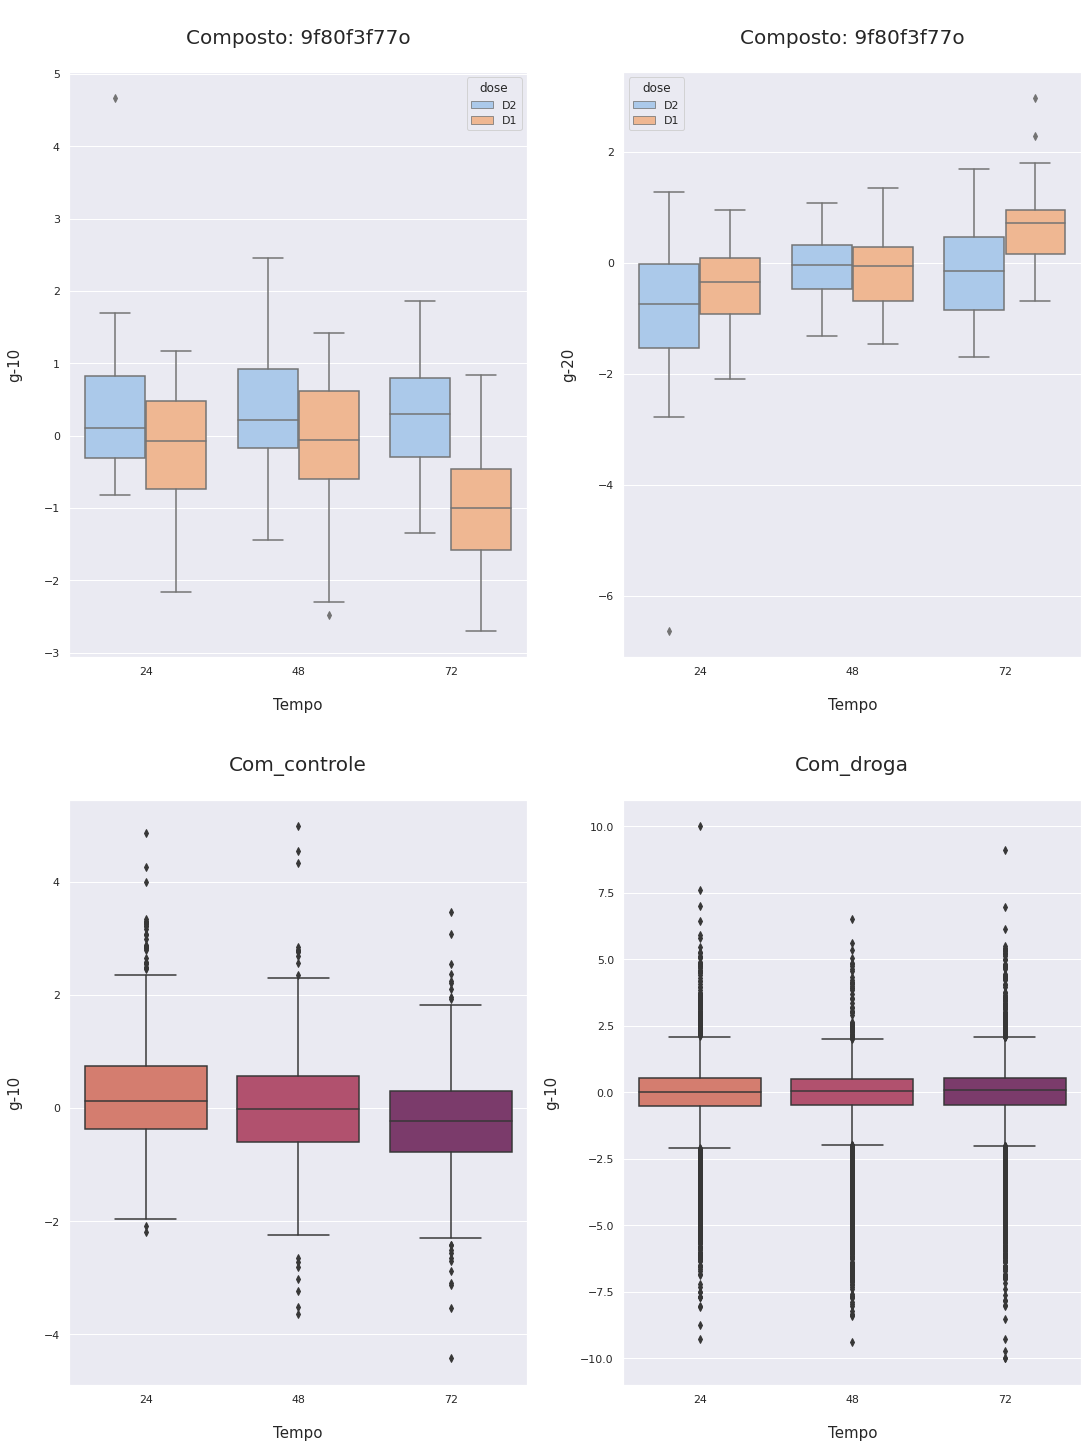

In [45]:
fig, ax = plt.subplots(2,2, constrained_layout=True, figsize=(15,20))

ax1= sns.boxplot(x='tempo', y='g-10', data=cpt, hue='dose', ax=ax[0,0], palette='pastel')
ax[0,0].set_xlabel('\nTempo', fontsize=15)
ax[0,0].set_ylabel('g-10\n', fontsize=15)
ax[0,0].set_title('\nComposto: 9f80f3f77o\n', family='san-serif', fontsize=20)

ax2 = sns.boxplot(x='tempo', y='g-20', data=cpt, hue='dose', ax=ax[0,1], palette='pastel')
ax[0,1].set_xlabel('\nTempo', fontsize=15)
ax[0,1].set_ylabel('g-20\n', fontsize=15)
ax[0,1].set_title('\nComposto: 9f80f3f77o\n', family='san-serif', fontsize=20)

ax3 = sns.boxplot(x='tempo', y='g-10', data=ctr, ax=ax[1,0], palette='flare')
ax[1,0].set_xlabel('\nTempo', fontsize=15)
ax[1,0].set_ylabel('g-10\n', fontsize=15)
ax[1,0].set_title('\nCom_controle\n', family='san-serif', fontsize=20)

ax3 = sns.boxplot(x='tempo', y='g-10', data=cdr, ax=ax[1,1], palette='flare')
ax[1,1].set_xlabel('\nTempo', fontsize=15)
ax[1,1].set_ylabel('g-10\n', fontsize=15)
ax[1,1].set_title('\nCom_droga\n', family='san-serif', fontsize=20)

plt.show()

Nesse trecho foi criado os gráficos e realizado a análise dos dados do gene g-10 e g-20 em relação ao Composto: 9f80f3f77o. E nos dois últimos gráficos, o gene g-10 em relação ao com_controle e com_droga.

##Desafio 06: Descobrir se tem algum composto que dependendo da configuração do experimento, ativa ou não ativa algum MOA

In [46]:
atv = df_dados_juntos.groupby(by='composto')['ativo_moa'].nunique()
atv

composto
00199ff52    1
00251fc41    1
00321ea80    1
0034c0847    1
0060e686f    1
            ..
ff9565933    1
ffd66e220    1
ffe357f8f    1
ffed8e1c9    1
fff7d208d    1
Name: ativo_moa, Length: 3289, dtype: int64

In [47]:
display(atv.describe())

count    3289.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: ativo_moa, dtype: float64

In [48]:
atv.sum()

3289

Podemos realizar por esse método, primeiro mudando todos as strings para int, depois dando um comando `describe()` para ver a quantidade de números no count, ou o número máximo e o mínimo

Nessa parte do código, mostra 

In [49]:
cont = 0
for cont2 in range(len(atv)):
  if atv[cont2] == 1:
    pass
  else:
    cont += 1
    print(atv[cont2].index)

if cont == 0:
  print('Todos os compostos apresentam somentem um tipo de ativação de moa')
else:
  pass

Todos os compostos apresentam somentem um tipo de ativação de moa


No código acima, retrata se algum composto por acaso ativa e não ativa genes dependendo da condição.

In [50]:
num = df_dados_juntos.groupby(by='composto')['num_moa'].nunique()
num

composto
00199ff52    1
00251fc41    1
00321ea80    1
0034c0847    1
0060e686f    1
            ..
ff9565933    1
ffd66e220    1
ffe357f8f    1
ffed8e1c9    1
fff7d208d    1
Name: num_moa, Length: 3289, dtype: int64

In [51]:
cont = 0
for cont2 in range(len(atv)):
  if num[cont2] == 1:
    pass
  else:
    cont += 1
    print(atv[cont2].index)

if cont == 0:
  print('Todos os compostos sempre ativam (ou não ativam) a mesma quantidade de mecanismos')
else:
  pass

Todos os compostos sempre ativam (ou não ativam) a mesma quantidade de mecanismos


No código acima, retrata se todos os composto sempre ativam ou não ativa a mesma quantidade de mecanismos

##Desafio 07: Descobrir se tem algum composto que dependendo da configuração do experimento, ativa MOAs diferentes

In [52]:
df_all = pd.merge(df_dados, df_dados_resultados.loc[:,:'wnt_inhibitor'], on='id')
df_all

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23810,id_fffb70c0c,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,0.6621,-0.2252,-0.5565,0.5112,0.6727,-0.1851,2.8650,-0.2140,-0.6153,0.8362,0.5584,-0.2589,0.1292,0.0148,

Nessa parte do código há uma junção da tabela de dados com a de resultados.

In [53]:
lista = df_dados_resultados.drop('id',axis=1).columns[:-2]
lista

Index(['5-alpha_reductase_inhibitor', '11-beta-hsd1_inhibitor',
       'acat_inhibitor', 'acetylcholine_receptor_agonist',
       'acetylcholine_receptor_antagonist', 'acetylcholinesterase_inhibitor',
       'adenosine_receptor_agonist', 'adenosine_receptor_antagonist',
       'adenylyl_cyclase_activator', 'adrenergic_receptor_agonist',
       ...
       'tropomyosin_receptor_kinase_inhibitor', 'trpv_agonist',
       'trpv_antagonist', 'tubulin_inhibitor', 'tyrosine_kinase_inhibitor',
       'ubiquitin_specific_protease_inhibitor', 'vegfr_inhibitor', 'vitamin_b',
       'vitamin_d_receptor_agonist', 'wnt_inhibitor'],
      dtype='object', length=206)

Ness trecho há uma lista com o nome dos mecanismos

In [54]:
comp = df_all.groupby(by='composto')

Agrupagem dos dados

In [56]:
for l in lista: 
  cont = 0
  grupo = comp[l].nunique()
  for cont1 in range(len(grupo)):
    if grupo[cont1] == 1:
      pass
    else:
      cont += 1
      print(grupo[cont1].index)

  if cont == 1:
    print(f'{l} pode ser ativado ou não')
print('Nenhum MOA diferente foi ativado ou desativado.')

Nenhum MOA diferente foi ativado ou desativado.


Trecho onde realiza-se a verificação.

##Desafio 08: Resumo do que você aprendeu com os dados

A aula4 foi uma aula muito extensa e com muito conhecimento, porém sinto que não entendi e não consegui realizar o exercício 5 de forma clara na inha cabeça, tive que copiar dos resultados no discord, vou estudar mais e ver se consigo entender melhor. Porém tirando esse desafio de resto foi ótimo, muitos aprendizados e coisas novas, como por exemplo:

*   Como dropar uma coluna da tabela;
*   Como ordenar os dados;
*   Como realizar a contagem de linhas;
*   Como adicionar uma coluna a um dataframe;
*   O comando `merge()` para unir dados de dois dataframes;
*   Realizar um boxplot com uma certa quantidade de índices;
*   Aprendi também a separa uam string por meio do `split()`;
*   Como monstar um dataframe;
*   Montar um gráfico de top-10;
*   O comando `astype()` para mudar o tipo do objeto que vai ser inserido no df;
*   Como criar colunas para encaixar no DataFrame;
*   Combinações de DF (`join()`,`merge()`,`count()`;

E também os conheicmentos biólogicos:

* Os nomes dificeis da tabela resultado são os mecanismos de ação da droga;
* Traz duas infromações, o alvo e a ação no alvo;
* Agonsita ative o executor e o antagonista não ativa;
* Penetração viral nas células acontece por meio dos receptores de membrana;
* Recpetores de membrana são produzidos por bactéria (As drogas bloqueadoras);

Acredito que no dia de hoje foi basicamente isso!
